# Feature engineering

Using expert/domain knowledge to create new feature from the data. Objective of feature engineering is to create efficient and more  generalizable algorithms.

Converting data to relevant numerical features requires a good understanding of domain knowledge.

But in real world this is rarely the case.

We need to convert
- Categorical data
- Text data
- Image data


to numerical and tabular format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [2]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


You may be tempted and can encode *Embarked* as 

S =0, C= 1, Q=2

In [3]:
titanic_df.replace({'Embarked': {"S":0, "C":1, "Q":2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.0


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
from sklearn import preprocessing
le =  preprocessing.LabelEncoder()
le.fit_transform( titanic_df.Embarked.dropna())
#titanic_df.Embarked.dropna().transform(le.fit_transform)

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

Or can use pandas categorical types codes

In [7]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_df.Embarked = titanic_df.Embarked.astype('category')

In [9]:
titanic_df['Embarked_code'] = titanic_df.Embarked.cat.codes
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
#Can you display the code values assigned to Embraked=NaN rows



Can you find an issue with this encoding?

use one-hot encoding, to denote presence or absence of a category

In [11]:
from sklearn import preprocessing
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')
le = preprocessing.OneHotEncoder(sparse=False)
le.fit_transform(titanic_df.Embarked.dropna().values.reshape((-1,1)))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Can you point one issue with approach

We can do this directly in pandas. Pandas supports this feature using get_dummies. 

In [12]:
pd.get_dummies(titanic_df, columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1,0,0


## Custom encoding

Let's say we only care whether you embarked from S, C or not

In [ ]:
titanic_df['is_S_C_embarked'] = np.where(titanic_df.Embarked.str.contains("S|C"), 1, 0)


There are other more advanced way to encode data. I don't have much personal experience.

Please see this article

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

http://contrib.scikit-learn.org/categorical-encoding/

In [13]:
!pip install category_encoders

In [14]:
# just show the use case
import category_encoders as ce
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["Embarked"])

encoder.fit_transform(titanic_df)

,intercept,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.75,-0.5,-0.25
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.25,-0.5,-0.25
2,1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.75,-0.5,-0.25
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,-0.75,-0.5,-0.25
4,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.75,-0.5,-0.25
5,1,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0.25,0.5,-0.25
6,1,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,-0.75,-0.5,-0.25
7,1,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,-0.75,-0.5,-0.25
8,1,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,-0.75,-0.5,-0.25
9,1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,0.25,-0.5,-0.25


# Text features

After cleanup of text data, we need to convert words/ paragraph into representative numerical values.

In [15]:
sample_corpus = ['data science with big data', 'Data science with hacking skill']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

en = CountVectorizer()

text_feat = en.fit_transform(sample_corpus)
text_feat

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [17]:

pd.DataFrame(text_feat.toarray(), columns=en.get_feature_names())

,big,data,hacking,science,skill,with
0,1,2,0,1,0,1
1,0,1,1,1,1,1


Can you find an issue with this encoding

To much weight on freqently occurring words.



One can use term frequency-inverse document frequency (TF–IDF) to fix above issue

Let $\mathcal{D}$ denotes corpus, $d$ a document, $t$ a  term, $N= |\mathcal{D}|$ number of documents. 

tf$(t,d)$ = frequency of term $t$ in the document $d$

idf$(t,\mathcal{D})= log\left(\frac{N}{|\{ d \in \mathcal{D}| t \in d \}|}\right)$

then 

tfidf(t,d, \mathcal{D}) = tf(t,d)* idf $(t,\mathcal{D})$

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
en = TfidfVectorizer()
X = en.fit_transform(sample_corpus)
pd.DataFrame(X.toarray(), columns=en.get_feature_names())

,big,data,hacking,science,skill,with
0,0.497675,0.708199,0.000000,0.354100,0.000000,0.354100
1,0.000000,0.379303,0.533098,0.379303,0.533098,0.379303


# Neural word embedding

word2vec model by [ Mikolov et al](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)


<img src="https://www.tensorflow.org/images/nce-nplm.png"> </img>

credit: https://www.tensorflow.org/tutorials/representation/word2vec

# t-sne projection of word2vec 

<img src="https://www.tensorflow.org/images/linear-relationships.png"> </img>

credit: https://www.tensorflow.org/tutorials/representation/word2vec

# pretrained embedding

https://nlp.stanford.edu/projects/glove/


https://github.com/stanfordnlp/GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [25]:
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(list(map(float, line.split()[1:])))
           for line in lines}

In [26]:
import itertools as itt
for k,v in itt.islice(w2v.items(), 3):
    print(k, v)

b'hotshots' [-0.038459  -0.31436    0.1767    -0.16123   -0.5245    -0.97075
  0.038924   0.2506     0.084478   0.81964   -0.24684   -0.24445
  0.23981    0.40332   -0.68067   -0.066323   0.52938    0.83573
 -0.10346    0.21126   -0.31382    0.34321    0.1959     0.9475
 -0.42687    0.45444   -0.33594   -0.302     -0.31354   -0.353
 -0.77928    1.0558     0.14318    0.034058   0.31477    0.20887
 -0.63704   -0.13314    0.34888   -0.13402   -0.31517   -0.16448
 -0.16413    0.77864    0.3298     0.41222    0.047969   0.0083561
 -0.076803  -0.1026   ]
b'93-93' [-0.43294  -0.22051  -0.56113   0.23523   0.61624  -0.21715   0.60153
  0.32809  -0.095313  0.29006  -0.43897  -0.41887  -0.20916   1.0532
 -0.1617   -0.41649  -0.6602   -0.091411  0.22396  -0.2545    0.83854
  0.21924   0.26266   0.37101  -0.3949    1.2132    0.76317   1.5242
  0.25525  -1.4443   -0.88878   0.91949   0.84835   0.77246  -0.80302
 -0.043941  0.32617   0.76303  -0.24041  -0.85992   0.79178  -1.6406
 -0.08025   1.1137 

# image features
- We can use raw pixel intensities
- Techniques from computer vision, like [HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)
  [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform)
- Already trained deep neural network(**imagenet, resnet, densenet** etc.) for feature extraction and fine tunning.
    + https://keras.io/applications/

In [ ]:
!pip install scikit-image

In [27]:
import skimage as skm
from skimage import feature


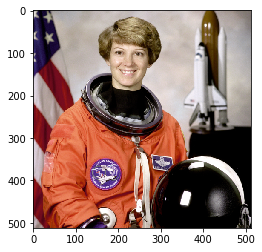

In [28]:
img = skm.data.astronaut()
plt.imshow(img)

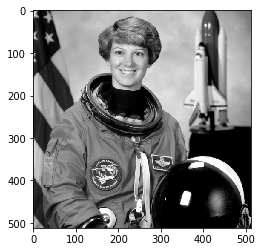

In [29]:
img_gry= skm.color.rgb2gray(img)
plt.imshow(img_gry, cmap='gray')

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


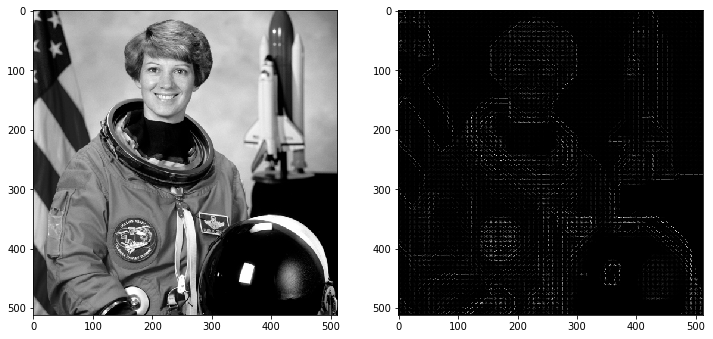

In [30]:
hog_feat, hog_vis = feature.hog(img_gry, visualise=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_gry, cmap='gray')
ax[1].imshow(hog_vis, cmap='gray')

# Modifying features

We'll touch this topics again in linear regression and machine learning(*basis function regression.*)

In [31]:
x= np.linspace(-8, 8, 10)
x

array([-8.        , -6.22222222, -4.44444444, -2.66666667, -0.88888889,
        0.88888889,  2.66666667,  4.44444444,  6.22222222,  8.        ])

In [32]:
np.random.seed(1)
y = x**2 + np.random.randn(len(x))*6
y

array([ 73.74607218,  35.0455109 ,  16.58405591,   0.67329938,
         5.98256923, -13.01910872,  17.5799817 ,  15.18584501,
        40.63028396,  62.50377775])

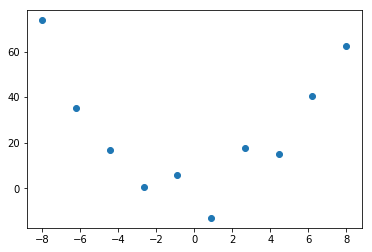

In [33]:
plt.scatter(x, y)

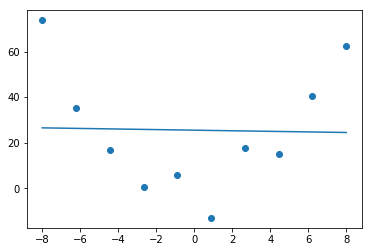

In [34]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
y_hat = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_hat)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(X)
X_poly

array([[ 1.        , -8.        , 64.        ],
       [ 1.        , -6.22222222, 38.71604938],
       [ 1.        , -4.44444444, 19.75308642],
       [ 1.        , -2.66666667,  7.11111111],
       [ 1.        , -0.88888889,  0.79012346],
       [ 1.        ,  0.88888889,  0.79012346],
       [ 1.        ,  2.66666667,  7.11111111],
       [ 1.        ,  4.44444444, 19.75308642],
       [ 1.        ,  6.22222222, 38.71604938],
       [ 1.        ,  8.        , 64.        ]])

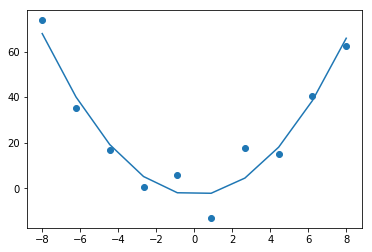

In [36]:
model = LinearRegression().fit(X_poly, y)
y_hat = model.predict(X_poly)
plt.scatter(x, y)
plt.plot(x, y_hat)

# More Resources(Automatic feature engineering)

- [Deep Feature Synthesis](http://www.jmaxkanter.com/static/papers/DSAA_DSM_2015.pdf)
- https://www.featuretools.com/demos/
- https://github.com/Featuretools/featuretools